# Differential Gene Analysis

## Setup

In [12]:
# install.packages(c("BiocManager", "pheatmap"))
# BiocManager::install("DESeq2")
# BiocManager::install("DEGreport")
# BiocManager::install("tximport")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'tximport'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'class', 'fansi', 'foreign', 'glmnet', 'jsonlite', 'later',
  'MASS', 'nlme', 'nnet', 'Rcpp', 'spatial'



In [13]:
library(DESeq2)
library(tidyverse)
library(RColorBrewer)
library(pheatmap)
library(DEGreport)
library(tximport)
library(ggplot2)
library(ggrepel)

## Load data

In [19]:
samples = list.files(path="../data", full.names=TRUE, pattern="salmon$")
files = file.path(samples, "quant.sf")
names(files) = str_replace(samples, "../data/", "") %>% str_replace(".salmon", "")

In [20]:
print(files)

                          Irrel_kd_1                           Irrel_kd_2 
"../data/Irrel_kd_1.salmon/quant.sf" "../data/Irrel_kd_2.salmon/quant.sf" 
                          Irrel_kd_3                           Mov10_kd_2 
"../data/Irrel_kd_3.salmon/quant.sf" "../data/Mov10_kd_2.salmon/quant.sf" 
                          Mov10_kd_3                           Mov10_oe_1 
"../data/Mov10_kd_3.salmon/quant.sf" "../data/Mov10_oe_1.salmon/quant.sf" 
                          Mov10_oe_2                           Mov10_oe_3 
"../data/Mov10_oe_2.salmon/quant.sf" "../data/Mov10_oe_3.salmon/quant.sf" 


In [21]:
tx2gene = read.delim("../data/tx2gene_grch38_ens94.txt")
tx2gene %>% View()

tx_id,ensgene,symbol
<chr>,<chr>,<chr>
ENST00000387314,ENSG00000210049,MT-TF
ENST00000389680,ENSG00000211459,MT-RNR1
ENST00000387342,ENSG00000210077,MT-TV
ENST00000387347,ENSG00000210082,MT-RNR2
ENST00000612848,ENSG00000276345,AC004556.1
ENST00000386347,ENSG00000209082,MT-TL1
ENST00000361390,ENSG00000198888,MT-ND1
ENST00000387365,ENSG00000210100,MT-TI
ENST00000387372,ENSG00000210107,MT-TQ


In [22]:
?tximport

In [23]:
txi = tximport(
    files,
    type="salmon",
    tx2gene=tx2gene[,c("tx_id", "ensgene")],
    countsFromAbundance="lengthScaledTPM"
)

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 


transcripts missing from tx2gene: 243

summarizing abundance

summarizing counts

summarizing length



## Viewing data

In [24]:
attributes(txi)

$names
[1] "abundance"           "counts"              "length"             
[4] "countsFromAbundance"

In [26]:
data = txi$counts %>% round() %>% data.frame()

In [27]:
data

,Irrel_kd_1,Irrel_kd_2,Irrel_kd_3,Mov10_kd_2,Mov10_kd_3,Mov10_oe_1,Mov10_oe_2,Mov10_oe_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,4376,3645,2968,6178,3688,3343,3114,2079
ENSG00000000005,27,29,23,37,13,25,38,22
ENSG00000000419,1478,1288,884,2369,1340,1890,1766,1271
ENSG00000000457,508,405,357,934,571,646,591,354
ENSG00000000460,1394,1164,850,2172,1217,1183,1139,673
ENSG00000000938,1,1,0,2,0,0,0,0
ENSG00000000971,22,18,7,16,2,9,20,4
ENSG00000001036,3258,2599,1980,4600,2781,2938,3178,1664
ENSG00000001084,3001,2438,1967,4703,3021,2327,2415,1556


In [28]:
sampletype = factor(c(rep("control",3), rep("MOV10_knockdown", 2), rep("MOV10_overexpression", 3)))
meta = data.frame(sampletype, row.names = colnames(txi$counts))

## Modeling count data

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 6724 rows containing missing values (geom_point).”


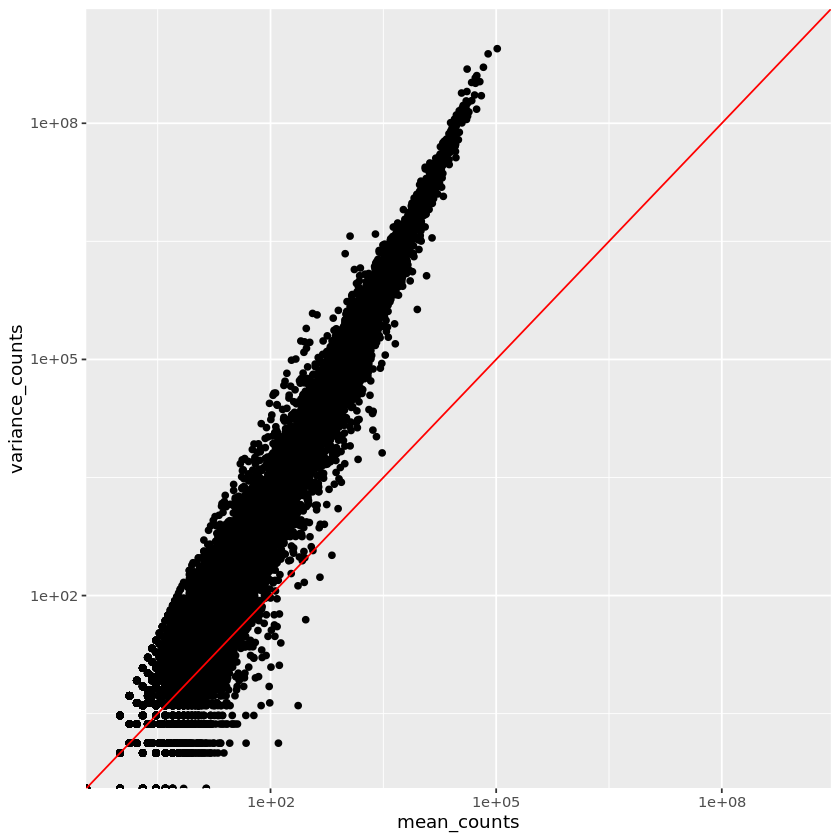

In [31]:
# The second argument '1' of 'apply' function indicates the function is being applied to rows.
# Use '2' if applied to columns 
mean_counts <- apply(data[,6:8], 1, mean)
variance_counts <- apply(data[,6:8], 1, var)
df <- data.frame(mean_counts, variance_counts)

ggplot(df) +
        geom_point(aes(x=mean_counts, y=variance_counts)) + 
        scale_y_log10(limits = c(1,1e9)) +
        scale_x_log10(limits = c(1,1e9)) +
        geom_abline(intercept = 0, slope = 1, color="red")